In [29]:
#In this final project, I am going to use two datasets, one is US household average income and the other one is average housing rent.
#The US household average income dataset can be find on : https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations/home
#The average housing rent dataset can be found on: https://www.kaggle.com/jweinflash/us-rent-by-county/data
#By using these two datasets, I want to find out the relationship between income and house renting price.

#First we are going to import the tools we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
%matplotlib inline

            id  State_Code   State_Name State_ab              County  \
0      1011000           1      Alabama       AL       Mobile County   
1      1011010           1      Alabama       AL      Barbour County   
2      1011020           1      Alabama       AL       Shelby County   
3      1011030           1      Alabama       AL       Mobile County   
4      1011040           1      Alabama       AL       Mobile County   
5      1011050           1      Alabama       AL      Cullman County   
6      1011060           1      Alabama       AL     Escambia County   
7      1011070           1      Alabama       AL       Elmore County   
8      1011080           1      Alabama       AL       Morgan County   
9      1011090           1      Alabama       AL    Talladega County   
10     1011100           1      Alabama       AL       DeKalb County   
11     1011110           1      Alabama       AL       Etowah County   
12     1011120           1      Alabama       AL       Butler Co

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count     15064.000000
mean      66474.470924
std       28860.065925
min        6804.000000
25%       46721.750000
50%       59920.000000
75%       80352.500000
max      242857.000000
Name: Average_Income, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


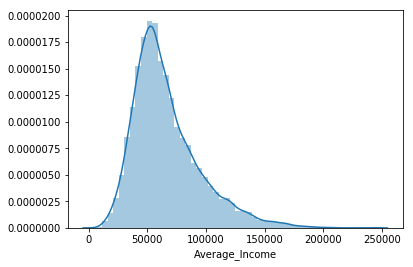

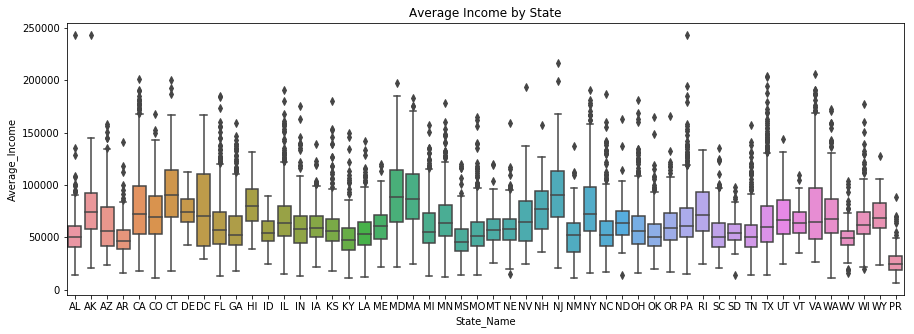

In [139]:
#Next we are going to load the income dataset.
df=pd.read_csv('income.csv')
print(df)

#Cleaning the useless data
to_drop=['id','State_Code','State_Name','County','Place','Type','Primary','ALand','AWater','Median','Stdev','sum_w']
df.drop(to_drop,inplace=True,axis=1)

#Dropping all rows with any NA values:
df.dropna()
df.dropna(how='all')
#We also need to drop the rows with the value of 0.
df = df[~(df == 0).any(axis=1)]

#Delete all the duplicated data
Newdf=df.drop_duplicates(['Zip_Code','Area_Code'])

#Rename the column in the dataset
Newdf.rename(columns={'Mean':'Average_Income'}, inplace=True)
print(Newdf)

#Analyze Average_Income
a=Newdf['Average_Income'].describe()
print(a)
#The average income in us is 66474.470924,the max income is 242857, and the min is 6804.

b=sns.distplot(Newdf['Average_Income'])
print(b)

#Create a boxplot to see the income by state
plt.figure(figsize=(15,5))
ax=sns.boxplot(x='State_ab',y='Average_Income',data=Newdf)
ax.set_title('Average Income by State')
ax.set_xlabel('State_Name')
ax.set_ylabel('Average_Income')
plt.show()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


             id  State_Code     State_Name State_ab             County  \
0        101901           1        Alabama       AL    Chambers County   
1        101904           1        Alabama       AL     Winston County   
2        101907           1        Alabama       AL    Marshall County   
3        101910           1        Alabama       AL     Pickens County   
4        101913           1        Alabama       AL      Etowah County   
5        101916           1        Alabama       AL     Calhoun County   
6        101919           1        Alabama       AL   Limestone County   
7        101922           1        Alabama       AL        Dale County   
8        101925           1        Alabama       AL        Clay County   
9        101928           1        Alabama       AL    Escambia County   
10       101931           1        Alabama       AL     Autauga County   
11       101934           1        Alabama       AL   Covington County   
12       101937           1        Ala

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


      State_ab            City  Zip_Code Area_Code        Lat         Lon  \
0           AL          Wadley     36276       256  33.091627  -85.527029   
1           AL         Addison     35540       256  34.202681  -87.178004   
2           AL     Albertville     35950       256  34.263130  -86.210660   
3           AL      Aliceville     35442       205  33.123686  -88.159364   
4           AL    Walnut Grove     35990       205  34.039204  -86.305697   
5           AL        Anniston     36207       256  33.673440  -85.810918   
6           AL         Ardmore     35739       256  34.987838  -86.829022   
7           AL          Ariton     36311       334  31.597772  -85.713061   
8           AL         Ashland     36251       256  33.269892  -85.833706   
9           AL          Atmore     36504       251  31.127936  -87.457643   
10          AL    Autaugaville     36003       334  32.432563  -86.658752   
11          AL             Opp     36467       334  31.302083  -86.319437   

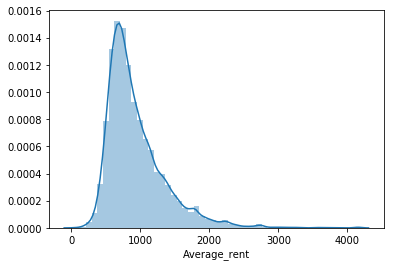

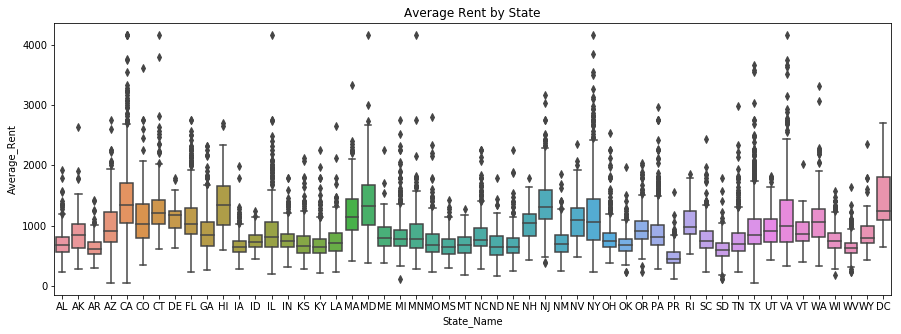

In [141]:
#Next we are going to load the rent dataset.
df1=pd.read_csv('rent.csv')
print(df1)

#Cleaning the useless data
to_drop=['id','State_Code','State_Name','County','Place','Type','Primary','ALand','AWater','Median','Stdev','Samples']
df1.drop(to_drop,inplace=True,axis=1)

#Dropping all rows with any NA values:
df1.dropna()
df1.dropna(how='all')
#We also need to drop the rows with the value of 0.
df1 = df1[~(df1 == 0).any(axis=1)]

#Delete all the duplicated data
Newdf1=df1.drop_duplicates(['Zip_Code','Area_Code'])

#Rename the column in the dataset
Newdf1.rename(columns={'Mean':'Average_rent'}, inplace=True)
print(Newdf1)

#Analyze Average_Income
c=Newdf1['Average_rent'].describe()
print(c)
#The average rent in US is 938.573264, the max rent is 4153 and min rent is 54.

d=sns.distplot(Newdf1['Average_rent'])
print(d)

#Create a boxplot to see the rent by state
plt.figure(figsize=(15,5))
ax=sns.boxplot(x='State_ab',y='Average_rent',data=Newdf1)
ax.set_title('Average Rent by State')
ax.set_xlabel('State_Name')
ax.set_ylabel('Average_Rent')
plt.show()

   State_ab      Zip_Code        Lat         Lon  Average_Income
0        AK  99668.088235  61.782201 -151.138046    77787.220588
1        AL  35903.770701  32.941550  -86.784597    52840.401274
2        AR  72125.097297  35.098879  -92.461652    49854.043243
3        AZ  85388.500000  33.495537 -111.795961    63737.207692
4        CA  93212.455420  35.878069 -119.668353    78973.778846
5        CO  80588.317269  39.428719 -105.167475    73886.397590
6        CT   6448.724551  41.517645  -72.827030    92726.520958
7        DC  20050.550000  38.908521  -77.020948    79240.500000
8        DE  19855.657143  39.280959  -75.520436    76288.571429
9        FL  33309.247839  27.958917  -81.837577    62049.126801
10       GA  30892.682500  33.229016  -83.818388    59522.345000
11       HI  96768.836735  21.004640 -157.276330    80450.000000
12       IA  51293.690299  42.044104  -93.227685    61661.694030
13       ID  83694.446809  44.300137 -114.977074    55287.202128
14       IL  61210.091057

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


                            OLS Regression Results                            
Dep. Variable:         Average_Income   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3231.
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           8.54e-48
Time:                        03:22:13   Log-Likelihood:                -543.09
No. Observations:                  52   AIC:                             1088.
Df Residuals:                      51   BIC:                             1090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Average_rent    69.9418      1.231     56.840   

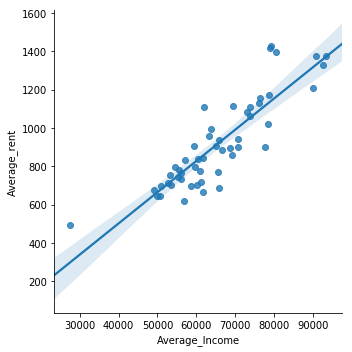

In [155]:
#In order to find the relationship between rent price and income, we need to average the rent and income by state.
#Average the income by state name
e=Newdf.groupby(['State_ab'], as_index=False).mean()
print(e) 

#Average the rent by state name
f=Newdf1.groupby(['State_ab'], as_index=False).mean()
print(f)

#Drop the data we don't need from e and f
g=e.drop(['Zip_Code','Lat','Lon'],axis=1)
print(g) 
#Now we only got State_ab and average income left

h=f.drop(['Zip_Code','Lat','Lon'],axis=1)
print(h)
#Now we only got State_ab and average rent left

#Combine those two datasets
ND=pd.merge(g,h)
print(ND)

#Linear relationship between income with rent
i=sns.lmplot(x='Average_Income',y='Average_rent',data=ND)
print(i)
print(smf.OLS(ND['Average_Income'], ND['Average_rent']).fit().summary())

 
